## Equal Weights Portfolio: Each stock in the portfolio has the same weight. If you invest in 5 stocks equally, each gets 20% of the capital.


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import math

## Load Stock list

In [3]:
tickers = pd.read_csv('top_50_indian_stocks.csv')
tickers.head()

,Ticker,Company Name
0,RELIANCE.NS,Reliance Industries
1,TCS.NS,Tata Consultancy Services
2,HDFCBANK.NS,HDFC Bank
3,INFY.NS,Infosys
4,ICICIBANK.NS,ICICI Bank


## Load the last Close Price and Market Cap for each stock

In [4]:
tickers_list = tickers['Ticker'].values.tolist()

def fetch_market_cap(ticker_list):
    data = yf.download(ticker_list, period='1d', group_by='ticker', auto_adjust=False)
    
    stocks_data = []
    for ticker in ticker_list:
        latest_price = data[ticker]['Close'].iloc[-1]
        market_cap = yf.Ticker(ticker).info.get("marketCap", 'N/A')
        stocks_data.append({
            "Ticker":  ticker,
            "Market Cap": market_cap,
            "Latest Price": latest_price
        })
    
    stocks_df = pd.DataFrame(stocks_data)

    return stocks_df

df = fetch_market_cap(tickers_list)
df.head()


[*********************100%***********************]  50 of 50 completed


,Ticker,Market Cap,Latest Price
0,RELIANCE.NS,19323057864704,1427.900024
1,TCS.NS,12466852462592,3445.699951
2,HDFCBANK.NS,14690426028032,1917.599976
3,INFY.NS,6639585329152,1602.000000
4,ICICIBANK.NS,10103038148608,1416.099976


## Sort the stock values by market cap

In [5]:
df = df.sort_values(by="Market Cap", ascending=False)
df

,Ticker,Market Cap,Latest Price
0,RELIANCE.NS,19323057864704,1427.900024
2,HDFCBANK.NS,14690426028032,1917.599976
1,TCS.NS,12466852462592,3445.699951
8,BHARTIARTL.NS,11026131058688,1840.400024
4,ICICIBANK.NS,10103038148608,1416.099976
6,SBIN.NS,7071422480384,792.349976
3,INFY.NS,6639585329152,1602.000000
7,BAJFINANCE.NS,5794756558848,933.099976
5,HINDUNILVR.NS,5448931475456,2319.000000
9,ITC.NS,5179585855488,413.899994


## Taking top 10 stocks

In [6]:
df = df.head(10)
df.reset_index(drop=True, inplace=True, allow_duplicates=False)
df

,Ticker,Market Cap,Latest Price
0,RELIANCE.NS,19323057864704,1427.900024
1,HDFCBANK.NS,14690426028032,1917.599976
2,TCS.NS,12466852462592,3445.699951
3,BHARTIARTL.NS,11026131058688,1840.400024
4,ICICIBANK.NS,10103038148608,1416.099976
5,SBIN.NS,7071422480384,792.349976
6,INFY.NS,6639585329152,1602.000000
7,BAJFINANCE.NS,5794756558848,933.099976
8,HINDUNILVR.NS,5448931475456,2319.000000
9,ITC.NS,5179585855488,413.899994


## Implementing an equal-weighted portfolio strategy to top 10 stocks

In [7]:
portfolio_size = int(input("Enter the amount you want to invest: "))
position_size = portfolio_size / len(df.index)
position_size

100000.0

In [8]:
df['No. of shares you can buy'] = df['Latest Price'].apply(lambda price: math.floor(position_size/price))
df

C:\Users\Payalkumavat\AppData\Local\Temp\ipykernel_31528\1767519146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No. of shares you can buy'] = df['Latest Price'].apply(lambda price: math.floor(position_size/price))


,Ticker,Market Cap,Latest Price,No. of shares you can buy
0,RELIANCE.NS,19323057864704,1427.900024,70
1,HDFCBANK.NS,14690426028032,1917.599976,52
2,TCS.NS,12466852462592,3445.699951,29
3,BHARTIARTL.NS,11026131058688,1840.400024,54
4,ICICIBANK.NS,10103038148608,1416.099976,70
5,SBIN.NS,7071422480384,792.349976,126
6,INFY.NS,6639585329152,1602.000000,62
7,BAJFINANCE.NS,5794756558848,933.099976,107
8,HINDUNILVR.NS,5448931475456,2319.000000,43
9,ITC.NS,5179585855488,413.899994,241


## Plot the results

<Axes: >

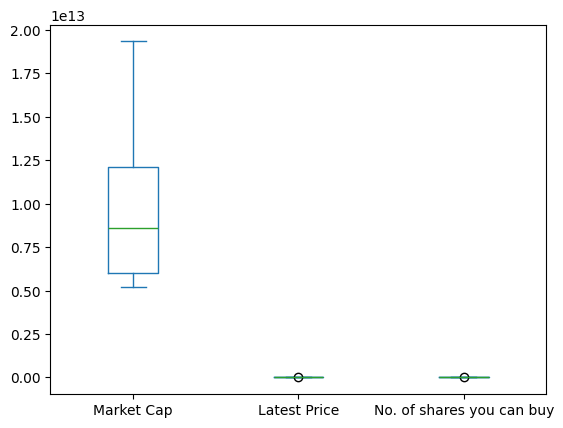

In [9]:
import matplotlib
df.plot.box()